<a href="https://colab.research.google.com/github/Viktoriia-Osmanova/main-repo/blob/main/Python_DS_HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Вказуємо посилання на сторінку з таблицею
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'

df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

# Виводимо вміст обраної таблиці
print(df)


               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Вивести перші рядки таблиці за допомогою методу head:

In [5]:
print(df.head())


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


Визначити кількість рядків та стовпців у датафреймі (атрибут shape):

In [6]:
print("Кількість рядків та стовпців:", df.shape)


Кількість рядків та стовпців: (28, 9)


Замініть у таблиці значення "—" на значення NaN

In [7]:
df.replace("—", float("NaN"), inplace=True)
print(df.head())


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


Визначити типи всіх стовпців за допомогою dataframe.dtypes:

In [8]:
print("Типи стовпців:")
print(df.dtypes)


Типи стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


Замінити типи нечислових колонок на числові:

In [9]:
df = df.apply(pd.to_numeric, errors='ignore')


Порахувати, яка частка пропусків міститься в кожній колонці:

In [10]:
missing_values = df.isnull().sum() / len(df)
print("Частка пропусків в кожній колонці:")
print(missing_values)


Частка пропусків в кожній колонці:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


Видалити з таблиці дані по всій країні, останній рядок таблиці:

In [11]:
df.drop(df.tail(1).index, inplace=True)
print(df)


               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Замінити відсутні дані в стовпцях середніми значеннями цих стовпців:

In [12]:
import pandas as pd

# Отримуємо список числових стовпців
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Замінюємо відсутні дані в числових стовпцях середніми значеннями
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
print(df)


               Регіон    1950       1960  1970  1990  2000  2012    2014  \
0                Крим  23.000  20.600000  16.0  13.0   7.3  12.6  11.144   
1           Вінницька  22.400  19.200000  14.2  12.4   8.4  11.2  10.900   
2           Волинська  24.700  25.000000  17.9  15.3  11.2  14.8  14.100   
3    Дніпропетровська  20.400  20.400000  15.1  12.3   7.1  11.2  11.100   
4            Донецька  27.100  21.400000  14.0  10.9   6.1   9.8   8.200   
5         Житомирська  26.100  22.300000  15.9  12.9   8.9  12.2  12.000   
6        Закарпатська  31.400  27.300000  20.7  16.8  11.5  15.1  14.600   
7          Запорізька  21.900  19.700000  15.0  12.4   7.1  10.6  10.600   
8   Івано-Франківська  24.300  24.800000  18.2  15.5  10.3  12.4  12.200   
9            Київська  20.400  18.900000  15.6  12.3   7.3  12.2  12.100   
10     Кіровоградська  21.600  17.100000  14.5  12.6   7.9  11.0  10.800   
11          Луганська  26.200  23.500000  14.4  11.6   6.2   9.6   5.100   
12          

Отримати список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні:

In [13]:
import numpy as np

# Замінюємо неправильні значення на NaN
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')

# Знаходимо регіони з вищим рівнем народжуваності у 2019 році за середнім по Україні
higher_birth_rate_regions = df[df['2019'] > df['2019'].mean()].index.tolist()

print("Список регіонів з вищим рівнем народжуваності у 2019 році за середнім по Україні:")
print(higher_birth_rate_regions)


Список регіонів з вищим рівнем народжуваності у 2019 році за середнім по Україні:
[2, 6, 8, 12, 14, 16, 20, 23, 25]


В якому регіоні була найвища народжуваність у 2014 році:

In [14]:
# Замінюємо неправильні значення на NaN
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')

# Знаходимо індекс максимального значення у стовпці '2014'
highest_birth_rate_region_2014 = df['2014'].idxmax()

print("Найвища народжуваність у 2014 році була в регіоні:", highest_birth_rate_region_2014)


Найвища народжуваність у 2014 році була в регіоні: 16


Побудувати стовпчикову діаграму народжуваності по регіонах у 2019 році:

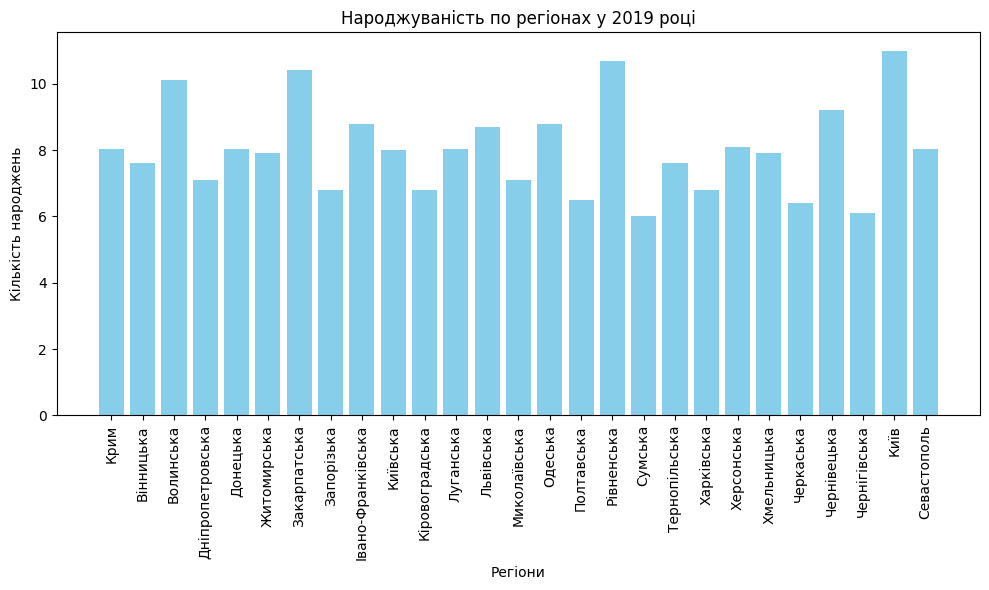

In [15]:
import matplotlib.pyplot as plt

# Вибираємо дані для побудови діаграми
data = df['2019']

# Вибираємо назви регіонів для відображення на діаграмі
regions = df['Регіон']

# Побудова стовпчикової діаграми
plt.figure(figsize=(10, 6))
plt.bar(regions, data, color='skyblue')
plt.xlabel('Регіони')
plt.ylabel('Кількість народжень')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xticks(rotation=90)  # Повертаємо підписи регіонів на 90 градусів для зручності
plt.tight_layout()  # Автоматично налаштовує розміри діаграми, щоб вона вмістилася повністю
plt.show()
